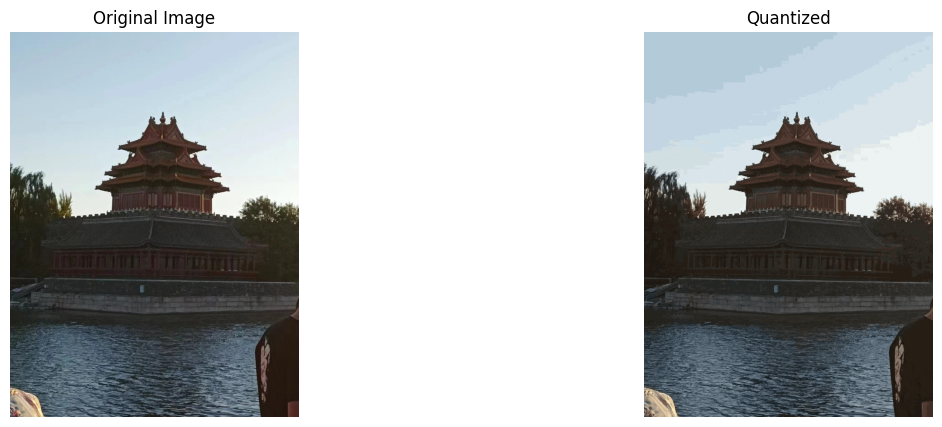

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

# 读取图像
image_path = './img/content.jpg'
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 方法3：量化
Z = image.reshape((-1, 3))
Z = np.float32(Z)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 64  # 颜色数量
_, labels, centers = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
quantized_image = centers[labels.flatten()]
quantized_image = quantized_image.reshape((image.shape))

quantized_image_save = Image.fromarray(quantized_image)
quantized_image_save.save('./img/quantized2.jpg')

# 显示结果
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Quantized')
plt.imshow(quantized_image)
plt.axis('off')

plt.show()